<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/overfitting-regularization/hold_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognizing overfitting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
random_seed = 0

In [ ]:
x, y = make_regression(n_samples=100,
                       n_features=100,
                       n_informative=10,
                       n_targets=1,
                       random_state = random_seed)

In [ ]:
x.shape

(100, 100)

In [ ]:
y.shape

(100,)

## Hold-out

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_seed)

In [ ]:
x_train.shape

(70, 100)

In [ ]:
x_test.shape

(30, 100)

In [ ]:
y_train.shape

(70,)

In [ ]:
y_test.shape

(30,)

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
def evaluate_model(model, dataset):
  x, y = dataset
  y_pred = model.predict(x)
  print(f"MSE:  {mean_squared_error(y, y_pred):.3f}")
  print(f"R2S:  {r2_score(y, y_pred):.3f}")

In [ ]:
# perfect model
evaluate_model(lr, (x_train, y_train))

MSE:  0.000
R2S:  1.000


In [ ]:
# poor model on unknown datasets
evaluate_model(lr, (x_test, y_test))

MSE:  9871.604
R2S:  0.531


## Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LinearRegression()
score = cross_val_score(lr, x, y, cv=5, scoring = 'r2')

In [ ]:
score

array([0.78066591, 0.62015804, 0.88685321, 0.69604852, 0.50904085])

In [ ]:
score.mean()

np.float64(0.6985533062814302)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
lr = LinearRegression()
cv_result = cross_validate(lr, x, y, cv=5, return_train_score=True)

In [ ]:
cv_result

{'fit_time': array([0.40686989, 0.37248468, 0.01041245, 0.06548071, 0.00396276]),
 'score_time': array([0.00146675, 0.00594044, 0.00254941, 0.00133061, 0.00841832]),
 'test_score': array([0.78066591, 0.62015804, 0.88685321, 0.69604852, 0.50904085]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
cv_result['train_score'].mean()

np.float64(1.0)

In [ ]:
cv_result['test_score'].mean()

np.float64(0.6985533062814302)

In [ ]:
cv_result['score_time'].mean()

np.float64(0.003941106796264649)

In [ ]:
cv_result['fit_time'].mean()

np.float64(0.17184209823608398)

In [ ]:
# to split the dataset into n batches
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

In [ ]:
kf.get_n_splits(x)

5

In [ ]:
train_score = []
test_score = []

for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  ss = StandardScaler()
  x_train = ss.fit_transform(x_train)
  x_test = ss.transform(x_test)

  lr = LinearRegression()
  lr.fit(x_train, y_train)

  r2_train = r2_score(y_train, lr.predict(x_train))
  r2_test = r2_score(y_test, lr.predict(x_test))

  train_score.append(r2_train)
  test_score.append(r2_test)


scores = {'train': np.array(train_score), 'test': np.array(test_score)}

In [ ]:
scores

{'train': array([1., 1., 1., 1., 1.]),
 'test': array([0.63227624, 0.65395404, 0.71145494, 0.64973226, 0.87203322])}

In [ ]:
scores['test'].mean()

np.float64(0.7038901400337564)

## Leave-one-out cross-validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
loo = LeaveOneOut()

loo.get_n_splits(x)

100

In [ ]:
train_cost = []
test_cost = []

for train_index, test_index in loo.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  ss = StandardScaler()
  x_train = ss.fit_transform(x_train)
  x_test = ss.transform(x_test)

  lr = LinearRegression()
  lr.fit(x_train, y_train)

  mse_train = mean_squared_error(y_train, lr.predict(x_train))
  mse_test = mean_squared_error(y_test, lr.predict(x_test))

  train_cost.append(mse_train)
  test_cost.append(mse_test)


costs = {'train': np.array(train_cost), 'test': np.array(test_cost)}

In [ ]:
costs['train'].mean()

np.float64(7.552088193378776e-26)

In [ ]:
costs['test'].mean()

np.float64(545.6715743870666)

## Ridge, Lasso and ElasticNet models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_seed)

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### Ordinary Least Square Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
evaluate_model(lr, (x_test, y_test))

MSE:  9871.604
R2S:  0.531


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=1.)
model.fit(x_train, y_train)

Ridge()

In [ ]:
evaluate_model(model, (x_train, y_train))

MSE:  4.465
R2S:  1.000


In [ ]:
evaluate_model(model, (x_test, y_test))

MSE:  9923.428
R2S:  0.528


### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso(alpha=1.)
model.fit(x_train, y_train)

Lasso()

In [ ]:
evaluate_model(model, (x_train, y_train))

MSE:  12.506
R2S:  0.999


In [ ]:
evaluate_model(model, (x_test, y_test))

MSE:  20.132
R2S:  0.999


### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = ElasticNet(alpha=1., l1_ratio=0.5)
model.fit(x_train, y_train)

ElasticNet()

In [ ]:
evaluate_model(model, (x_train, y_train))

MSE:  1267.943
R2S:  0.917


In [ ]:
evaluate_model(model, (x_test, y_test))

MSE:  11968.468
R2S:  0.431


L1 regularization gives us a better result

### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

In [ ]:
train_sizes_abs, train, test = learning_curve(
    Lasso(),
    x,
    y,
    random_state=random_seed
)

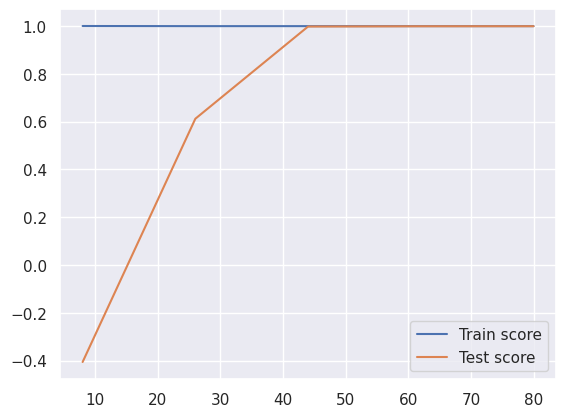

In [ ]:
plt.plot(train_sizes_abs, train.mean(axis=1), label='Train score')
plt.plot(train_sizes_abs, test.mean(axis=1), label='Test score')
plt.legend()
plt.show()